# Carga de datos del dataset Cleveland Heart Disease

In [1]:
import pandas as pd
import os
import numpy as np


# Obtener la ruta absoluta del directorio raíz del proyecto
ruta_proyecto = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Construir la ruta al dataset
ruta_csv = os.path.join(ruta_proyecto, "data_sample/cleveland_heart_disease.csv")

# Cargar el dataset
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(ruta_csv, names=column_names)



# 0. Problema de negocio y tema


Las enfermedades cardíacas siguen siendo una de las principales causas de muerte a nivel mundial. De hecho, según un estudio de la [Organización Mundial de la Salud (OMS)](https://www.who.int/es/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)) es la principal causa de muerte en el mundo.

Detectarlas de forma temprana puede salvar vidas, reducir hospitalizaciones, disminuir costes del sistema sanitario y mejorar la calidad de vida de los pacientes. Sin embargo, los diagnósticos suelen depender de múltiples pruebas clínicas que requieren recursos, tanto a nivel de tiempo como de personal.

Usar **modelos de Machine Learning** podría aportar ciertos **beneficios** a esta causa suponiendo un apoyo al diagnóstico temprano, tomando decisiones de una manera más rápida, reduciendo costes médicos al predecir con mayor certeza qué pacientes podrían necesitar más pruebas, entre otros.

El **objetivo de este proyecto** es construir un modelo de Machine Learning que sea capaz de predecir la presencia o ausencia de enfermedad en un paciente. La manera de abordarlo ha sido a través de una  **tarea de clasificación binaria**, donde el modelo debe distinguir entre dos clases:

- `0`: El paciente **no presenta** enfermedad cardíaca.
- `1`: El paciente **presenta** enfermedad cardíaca.

Además, la estructura que he trabajado es la siguiente:

1. Un análisis exploratorio de datos (EDA) para entender los datos del dataset, identificar relaciones y preparar los datos.

2. Un proceso de preprocesamiento y transformación de las variables.

3. La evaluación de diferentes modelos y selección de aquel que sea más robusto en función de las métricas como precisión, recall, F1 score, etc.

4. La validación final y guardado del modelo para su posterior uso.

# 1. Exploración de Datos (EDA)

| Variable   | Tipo        | Descripción                                                                  | Unidades / Valores                                              | ¿Faltan datos? |
|------------|-------------|-------------------------------------------------------------------------------|------------------------------------------------------------------|----------------|
| age        | Numérica    | Edad del paciente                                                            | Años                                                             | No             |
| sex        | Categórica  | Sexo del paciente                                                            | 0 = mujer, 1 = hombre                                            | No             |
| cp         | Categórica  | Tipo de dolor torácico                                                       | 0 = típico anginoso, 1 = atípico, 2 = no anginoso, 3 = asintomático | No          |
| trestbps   | Numérica    | Presión arterial en reposo al ingreso                                        | mm Hg                                                            | No             |
| chol       | Numérica    | Colesterol sérico                                                            | mg/dl                                                            | No             |
| fbs        | Categórica  | Glucemia en ayunas > 120 mg/dl                                               | 1 = sí, 0 = no                                                   | No             |
| restecg    | Categórica  | Resultados del electrocardiograma en reposo                                  | 0 = normal, 1 = anomalía ST-T, 2 = hipertrofia ventricular        | No             |
| thalach    | Numérica    | Frecuencia cardíaca máxima alcanzada                                         | Latidos por minuto                                               | No             |
| exang      | Categórica  | Angina inducida por ejercicio                                                | 1 = sí, 0 = no                                                   | No             |
| oldpeak    | Numérica    | Depresión del ST después del ejercicio respecto al reposo                    | Valor decimal (por ejemplo, 1.4)                                 | No             |
| slope      | Categórica  | Pendiente del segmento ST durante el ejercicio máximo                        | 0 = descendente, 1 = plana, 2 = ascendente                       | No             |
| ca         | Numérica    | Número de vasos principales vistos mediante fluoroscopía                     | 0 a 3                                                            | Sí             |
| thal       | Categórica  | Resultado de la prueba de talio (thalassemia)                                | 3 = normal, 6 = defecto fijo, 7 = defecto reversible             | Sí             |
| target     | Categórica  | Diagnóstico de enfermedad cardíaca                                           | 0 = no enfermedad, 1 = enfermedad presente                       | No             |


In [2]:
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
# Asegurar que todos los valores son strings antes de reemplazar
df = df.map(lambda x: str(x).strip() if isinstance(x, str) else x)

# Reemplazar "?" por NaN
df.replace("?", np.nan, inplace=True)


In [4]:
# Volver a observar el dataset tras los cambios
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
print(len(df))

303


In [7]:
df.dropna(inplace=True)
print(len(df))

297


In [8]:
# Comprobar valores nulos
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Antes de avanzar en el preprocesamiento, transformación y escalado, veo que en el dataset la variable target puede tener 5 posibles valores: 0, 1, 2, 3, 4. Cada número indica un nivel de presencia de enfermedad cardíaca:

- `0`: Sin enfermedad.

- `1` a `4`: Distintos grados de enfermedad.

Dado que el objetivo de este proyecto es predecir si un paciente presenta o no enfermedad cardíaca - sin distinguir su gravedad-, es conveniente **transformar esta variable a una clasificación binaria**, donde:

- `0` indica ausencia de enfermedad.
- `1` indica presencia de enfermedad (en cualquiera de sus grados).

In [9]:
# Distribución del target (variable a predecir)
print(df["target"].value_counts())

target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


In [10]:
# La convierto a clasificacion binaria
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
print(df["target"].value_counts())

target
0    160
1    137
Name: count, dtype: int64


In [11]:
# Estadísticas descriptivas
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


/var/folders/55/82tx2z2s48gcw8bmyvkymly00000gn/T/ipykernel_72022/3725682101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="viridis")


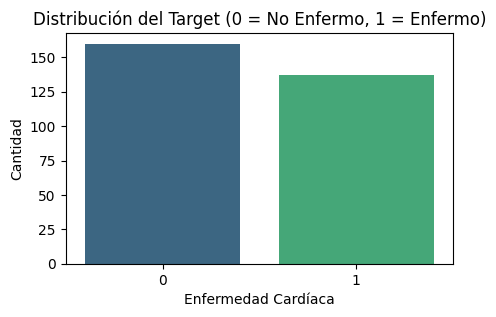

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.countplot(x=df["target"], palette="viridis")
plt.title("Distribución del Target (0 = No Enfermo, 1 = Enfermo)")
plt.xlabel("Enfermedad Cardíaca")
plt.ylabel("Cantidad")
plt.show()

El dataset está bastante balanceado entre pacientes sanos y enfermos. Esto es bueno porque evita el sesgo hacia una clase en concreto, permitiendo que los modelos que use a posteriori aprendan bien ambos casos

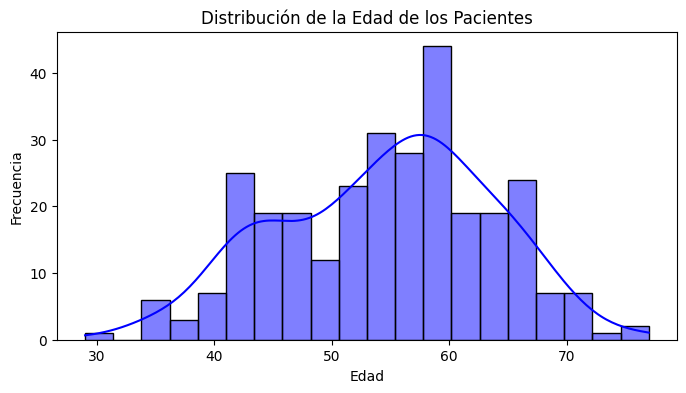

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df["age"], bins=20, kde=True, color="blue")
plt.title("Distribución de la Edad de los Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Los pacientes se encuentran entre los 50 y 60 años que, por lo general, es cuando suelen aparecer más casos de enfermedad cardíaca.

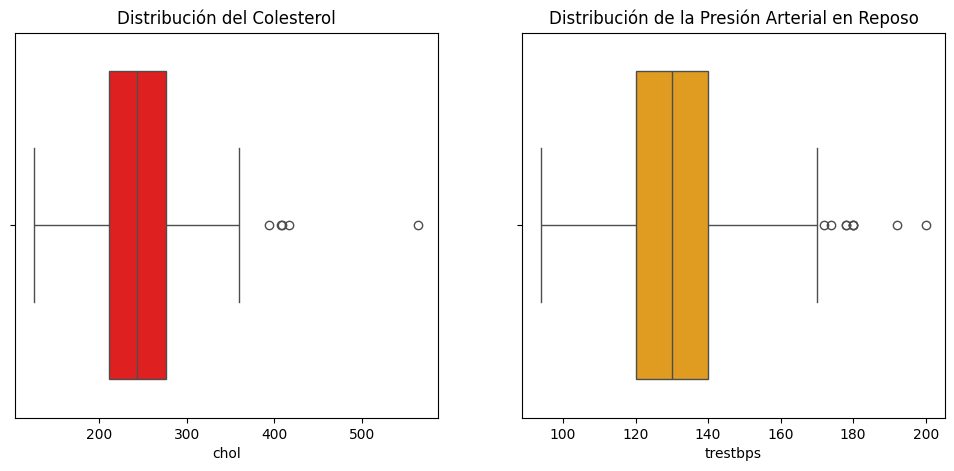

In [14]:
plt.figure(figsize=(12,5))

# Boxplot de Colesterol
plt.subplot(1, 2, 1)
sns.boxplot(x=df["chol"], color="red")
plt.title("Distribución del Colesterol")

# Boxplot de Presión Arterial en Reposo
plt.subplot(1, 2, 2)
sns.boxplot(x=df["trestbps"], color="orange")
plt.title("Distribución de la Presión Arterial en Reposo")

plt.show()

Tanto el colesterol como la presión arterial tienen outliers que podrían distorsionar los modelos.

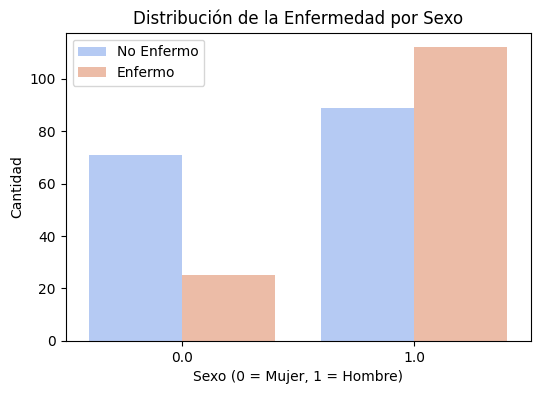

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="target", data=df, palette="coolwarm")
plt.title("Distribución de la Enfermedad por Sexo")
plt.xlabel("Sexo (0 = Mujer, 1 = Hombre)")
plt.ylabel("Cantidad")
plt.legend(["No Enfermo", "Enfermo"])
plt.show()

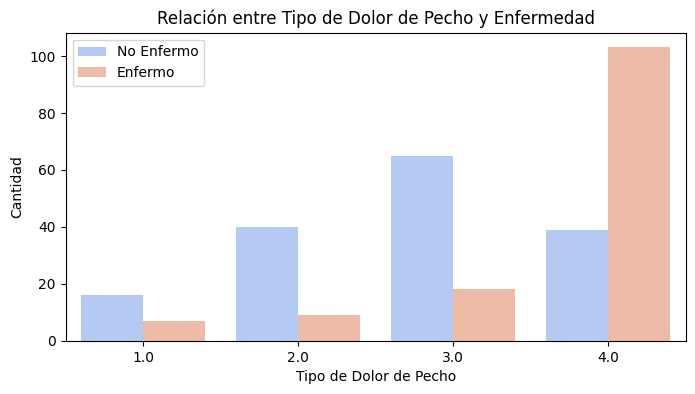

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x="cp", hue="target", data=df, palette="coolwarm")
plt.title("Relación entre Tipo de Dolor de Pecho y Enfermedad")
plt.xlabel("Tipo de Dolor de Pecho")
plt.ylabel("Cantidad")
plt.legend(["No Enfermo", "Enfermo"])
plt.show()

El tipo de dolor torácico (cp) está claramente relacionado con la enfermedad: ciertos tipos están mucho más asociados a pacientes enfermos

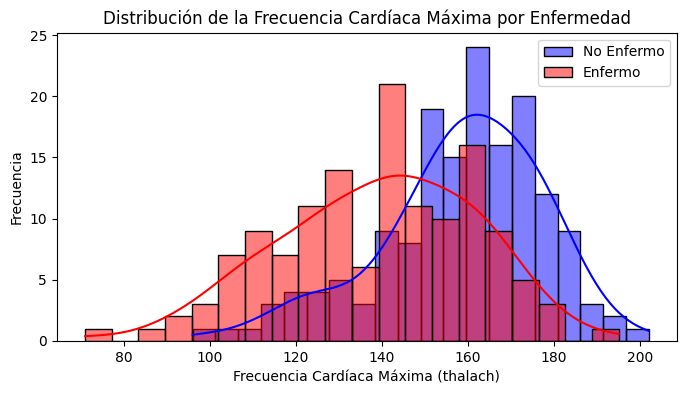

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df[df["target"] == 0]["thalach"], bins=20, color="blue", label="No Enfermo", kde=True)
sns.histplot(df[df["target"] == 1]["thalach"], bins=20, color="red", label="Enfermo", kde=True)
plt.title("Distribución de la Frecuencia Cardíaca Máxima por Enfermedad")
plt.xlabel("Frecuencia Cardíaca Máxima (thalach)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Hago una matriz de correlación para la variable `thalach`, que representa la frecuencia cardíaca máxima alcanzada en una prueba de esfuerzo. Además, un valor alto indica que el paciente tiene buena capacidad cardiovascular, lo cual podría reducir la probabilidad de desarrollar una enfermedad.

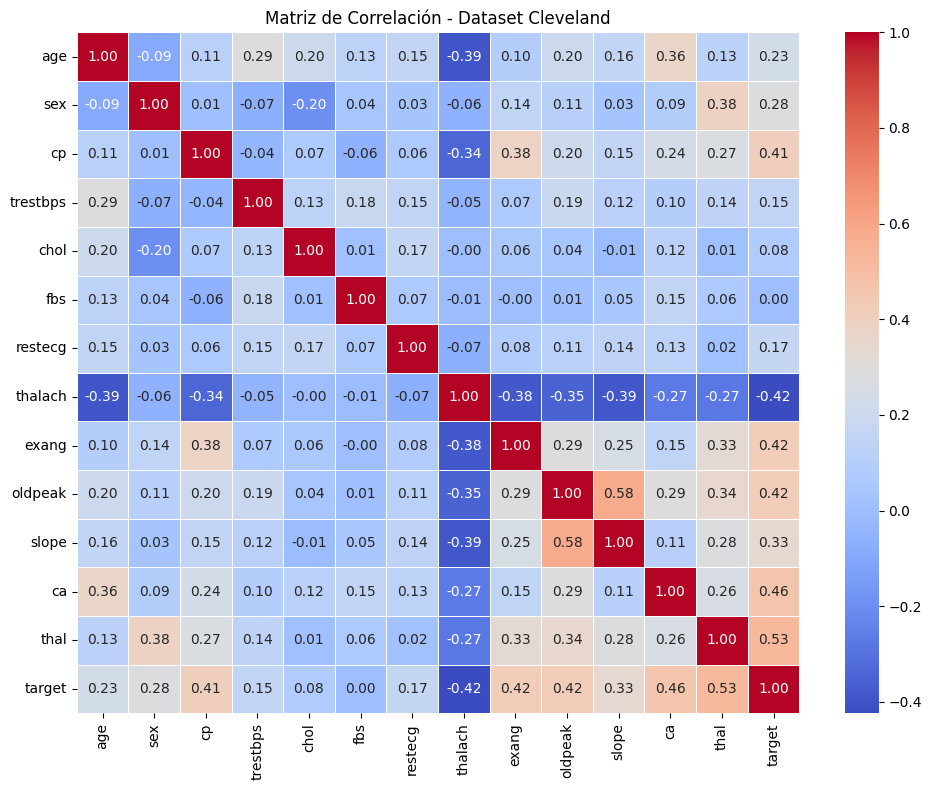

In [18]:
# Matriz de correlación
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)

plt.title("Matriz de Correlación - Dataset Cleveland")
plt.tight_layout()
plt.show()

La frecuencia cardíaca máxima tiene una correlación negativa significativa con el target (-0.42). Esto indica que cuanto menor es la capacidad de esfuerzo cardíaco, más probable es que el paciente tenga enfermedad, lo cual es relevante a nivel clinico.

El resumen del EDA:

- **Distribución del Target**. El dataset está equilibrado entre pacientes sanos y enfermos lo cual es positivo para evitar cierto sesgo en el aprendizaje.
- **Variables numéricas**. La mayoría de los pacientes tienen entre 50 y 60 años. Se detectan outliers en colesterol (chol) y presión arterial (trestbps) pero en mi caso he decido no eliminarlos ni transformarlos, ya que los modelos seleccionados (RandomForest, XGBoost, etc.) son robustos frente a valores extremos. 
- **Variables categóricas**. El tipo de dolor torácico (cp) muestra una relación clara con la enfermedad: algunos tipos están más presentes en pacientes enfermos. Los hombres presentan mayor proporción de enfermedad que las mujeres.
- **Correlaciones relevantes**. thalach (frecuencia cardíaca máxima) tiene correlación negativa (-0.42) con el target

# 2. Preprocesamiento, transformación y escalado

In [19]:
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict


Primero he separado las variables predictoras (X) de la variable objetivo (y) y he dividido los datos en conjuntos de entrenamiento (80%) y prueba (20%), utilizando stratify para mantener la proporción de clases. 

In [20]:
# Separar en variables predictoras (X) y target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

A continuación, he identificado las columnas numéricas y categóricas:
- Para las variables numéricas, he construido un pipeline que aplica un escalado estándar (StandardScaler) para normalizar la distribución. 
- Para las variables categóricas, he usado la moda y he aplicado codificación mediante One-Hot Encoding

Ambos pipelines los he combinado en un ColumnTransformer, que aplica las transformaciones adecuadas según el tipo de variable. Posteriormente, he creado un pipeline completo que encadena el preprocesamiento con un modelo XGBClassifier. 

Finalmente, he utilizado GridSearchCV para realizar una búsqueda de hiperparámetros con validación cruzada, optimizando la métrica de recall, y he evaluado el rendimiento del modelo en el conjunto de prueba mediante un informe de clasificación que incluye precisión, recall y F1-score.

In [21]:
# 1. Separar columnas numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# 1.1 Pipeline para variables numéricas: imputación + escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 1.2 Pipeline para variables categóricas: imputación + codificación one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


# 2. Pipelines de preprocesamiento: 
# 2.1 Pipeline para variables numéricas: imputación + escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 2.2 Pipeline para variables categóricas: imputación + codificación one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 3. ColumnTransformer para aplicar el preprocesamiento según tipo de variable
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 4. Pipeline final: preprocesamiento + modelo XGBClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# 4. Búsqueda de hiperparámetros con GridSearchCV
# 4.1 Definición de la rejilla de hiperparámetros
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.05, 0.1]
}

# 4.2 Búsqueda con validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# 5. Predicciones y evaluación
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



Durante el preprocesamiento, utilicé el modelo XGBClassifier integrado en un Pipeline junto con las transformaciones necesarias para variables numéricas y categóricas. Esto me ha permitido aprovechar la capacidad predictiva de XGBoost para:

- Realizar una búsqueda de hiperparámetros mediante GridSearchCV.

- Obtener una primera estimación del potencial predictivo del dataset.

- Evaluar preliminarmente qué variables podían tener mayor peso en el modelo.

Sin embargo, usar XGBClassifier en esta fase no implica que sea el modelo definitivo, ya que el objetivo del proyecto es construir una solución robusta basada en una comparación objetiva de diferentes algoritmos. Por esta razón tras finalizar el preprocesamiento, he entrado y evaluado los siguientes 5 modelos 

# 3. Modelos de Machine Learning

Tras finalizar el preprocesamiento, he entrenado y evaluado cinco modelos clásicos de clasificación bajo las mismas condiciones:

- Regresión Logística

- Random Forest

- SVM (SVC)

- Gradient Boosting

- MLPClassifier (red neuronal multicapa)

Todos los modelos fueron integrados en un Pipeline común con el preprocesamiento, y evaluados con los datos de test utilizando las siguientes métricas:

- Accuracy: proporción total de aciertos.

- Recall: capacidad para detectar correctamente los casos positivos.

- F1-Score: equilibrio entre precisión y recall, especialmente importante en problemas desbalanceados.

In [22]:
# Ruta donde guardo los modelos
ruta_modelos = os.path.join("..", "models")
os.makedirs(ruta_modelos, exist_ok=True)
print("Ruta absoluta donde se guardarán los modelos:", os.path.abspath(ruta_modelos))


# Diccionario con los modelos a evaluar
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Lista para guardar resultados
results = []

for model_name, model in models.items():
    print(f"\n🔍 Entrenando modelo: {model_name}")
    
    # Crear pipeline con preprocesamiento + modelo
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Entrenar
    pipeline.fit(X_train, y_train)
    
    # Predecir
    y_pred = pipeline.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar métricas
    results.append({
        "Model": model_name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1-Score": round(f1, 3)
    })

    # Guardar modelo en src/models correctamente
    path_modelo = os.path.join(ruta_modelos, f"{model_name}.joblib")
    joblib.dump(pipeline, path_modelo)
    print(f"✅ Modelo {model_name} guardado en: {path_modelo}")
    print("¿El archivo existe?", os.path.isfile(path_modelo))
    print(classification_report(y_test, y_pred))

# Mostrar tabla comparativa
df_results = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

print("\n📈 Comparativa de modelos (ordenados por F1-Score):")
display(df_results)


Ruta absoluta donde se guardarán los modelos: /Users/beatrizcartiel/Desktop/src/models

🔍 Entrenando modelo: LogisticRegression
✅ Modelo LogisticRegression guardado en: ../models/LogisticRegression.joblib
¿El archivo existe? True
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60


🔍 Entrenando modelo: RandomForest
✅ Modelo RandomForest guardado en: ../models/RandomForest.joblib
¿El archivo existe? True
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82   

,Model,Accuracy,Precision,Recall,F1-Score
2,SVC,0.850,0.880,0.786,0.830
0,LogisticRegression,0.817,0.840,0.750,0.792
1,RandomForest,0.817,0.840,0.750,0.792
4,MLPClassifier,0.800,0.786,0.786,0.786
3,GradientBoosting,0.800,0.808,0.750,0.778


# 4. Análisis de los resultados

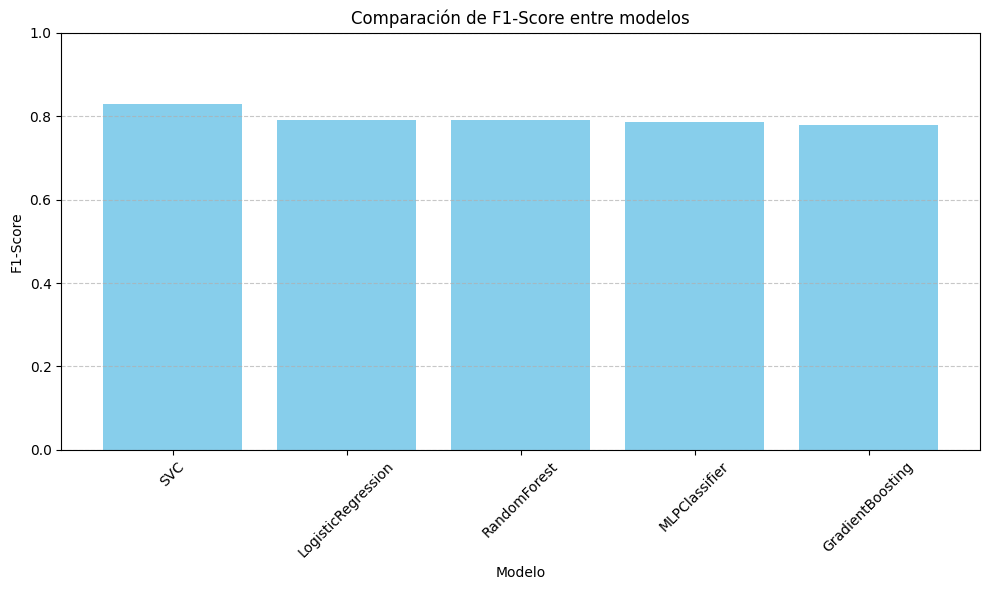

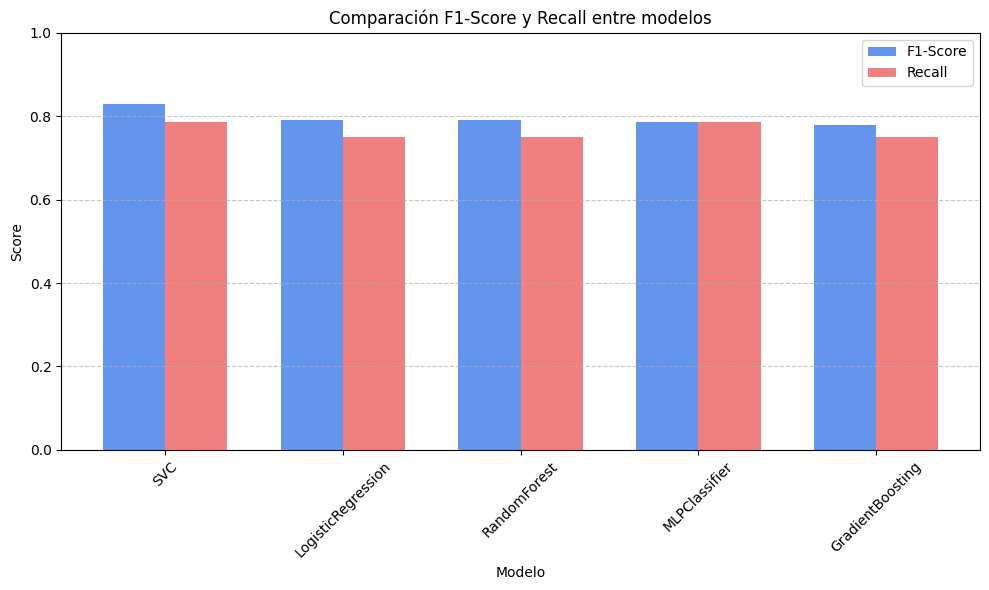

In [23]:
import matplotlib.pyplot as plt

# Gráfico general: F1-Score de todos los modelos
plt.figure(figsize=(10, 6))
plt.bar(df_results["Model"], df_results["F1-Score"], color='skyblue')
plt.title("Comparación de F1-Score entre modelos")
plt.ylabel("F1-Score")
plt.xlabel("Modelo")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico comparativo: F1-Score y Recall lado a lado
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df_results))

plt.bar(index, df_results["F1-Score"], bar_width, label="F1-Score", color="cornflowerblue")
plt.bar([i + bar_width for i in index], df_results["Recall"], bar_width, label="Recall", color="lightcoral")

plt.xlabel("Modelo")
plt.ylabel("Score")
plt.title("Comparación F1-Score y Recall entre modelos")
plt.xticks([i + bar_width / 2 for i in index], df_results["Model"], rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


He evaluado cinco modelos de clasificación: Regresión Logística, Random Forest, SVC, Gradient Boosting y MLPClassifier.

**El modelo que mejor ha funcionado en términos generales ha sido SVC, con un F1-Score de 0.83**, seguido muy de cerca por Regresión Logística y Random Forest, ambos con 0.792.SVC ha demostrado una alta precisión (0.88) y un buen equilibrio con el recall (0.79), por lo que es el modelo más eficaz en cuanto a rendimiento puro.

Aun así, tanto Logistic Regression como Random Forest han ofrecido resultados muy competitivos y además son modelos más interpretables, lo que los hace especialmente útiles si es importante justificar las decisiones. MLPClassifier ha mostrado un rendimiento equilibrado, mientras que Gradient Boosting ha sido el modelo con métricas más bajas en esta comparativa.

En resumen, si priorizo la precisión del modelo, me quedo con SVC; pero si valoro más la interpretabilidad y robustez, optaría por Random Forest o Logistic Regression.

El mejor modelo fue el SVC destacando especialmente en:

- Accuracy (0.85): la proporción total de predicciones correctas.

- Precision (0.88): gran capacidad de acierto en las predicciones positivas.

- F1-Score (0.83): excelente equilibrio entre precisión y sensibilidad.

